<a href="https://colab.research.google.com/github/RafsanJany-44/Machine-School/blob/main/RandomForestClassifier_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librery

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = 'https://raw.githubusercontent.com/RafsanJany-44/Machine-School/main/datasets/HMC_WITH_BIOM.csv'

dataset = pd.read_csv(data)


#Spliting

In [2]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


#Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model (RandomForestClassifier)

Normal Model

In [4]:
from sklearn.ensemble import RandomForestClassifier
rfc_class = RandomForestClassifier(n_estimators=8)
rfc_class.fit(X_train, y_train)
y_pred=rfc_class.predict(X_test)

Tunning

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
estimators=60
estimators_range = range (1,estimators+1)
scores={}
scores_list = []
for k in estimators_range:
  rfc_class = RandomForestClassifier(n_estimators=k)
  rfc_class.fit(X_train, y_train)
  y_pred=rfc_class.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(estimators)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))

1/60 round completed......................... Accurecy: 0.6517220902612827
2/60 round completed......................... Accurecy: 0.6199524940617577
3/60 round completed......................... Accurecy: 0.7057600950118765
4/60 round completed......................... Accurecy: 0.7167458432304038
5/60 round completed......................... Accurecy: 0.7375296912114014
6/60 round completed......................... Accurecy: 0.7363420427553444
7/60 round completed......................... Accurecy: 0.7581650831353919
8/60 round completed......................... Accurecy: 0.7543052256532067
9/60 round completed......................... Accurecy: 0.7603919239904988
10/60 round completed......................... Accurecy: 0.7661817102137767
11/60 round completed......................... Accurecy: 0.7685570071258907
12/60 round completed......................... Accurecy: 0.7721199524940617
13/60 round completed......................... Accurecy: 0.7707838479809976
14/60 round completed

In [13]:
print("The best estimators:")
print(list(scores.keys())[scores_list.index(max(scores_list))])#min(scores_list)

The best estimators:
58


Graph

Text(0, 0.5, 'Testing Accuracy')

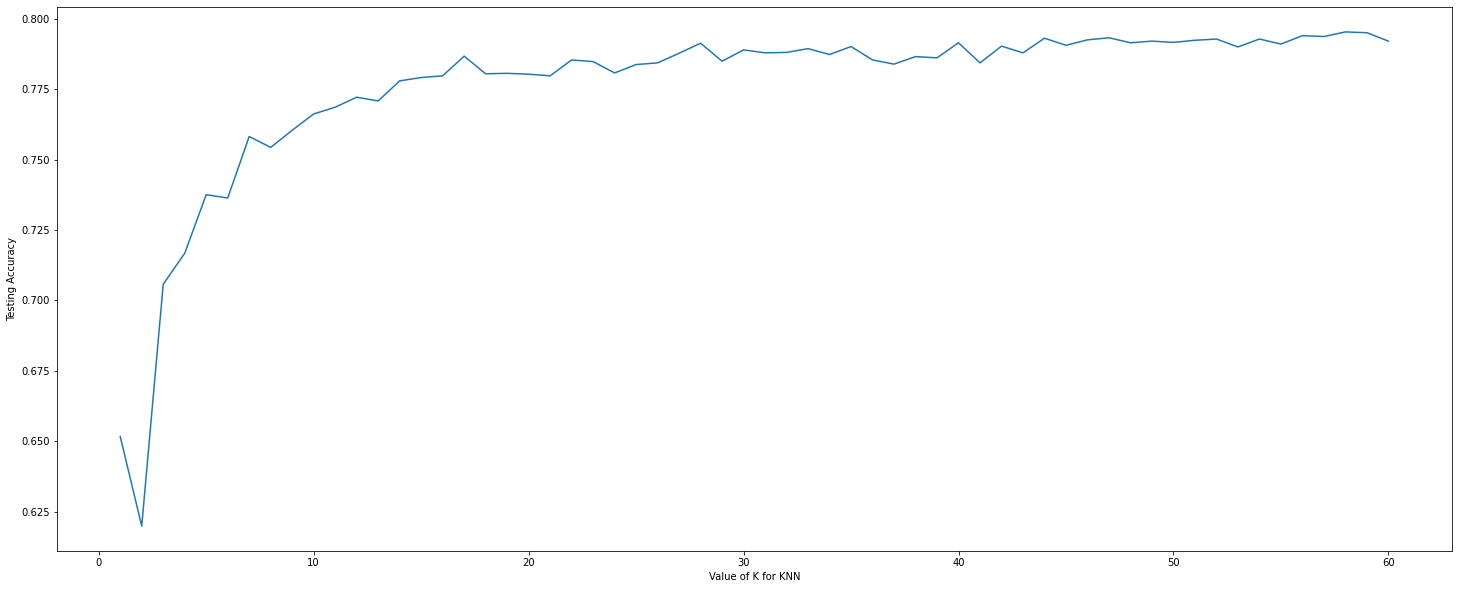

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(estimators_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel ('Testing Accuracy')

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc_class = RandomForestClassifier(n_estimators=58)
rfc_class.fit(X_train, y_train)
y_pred=rfc_class.predict(X_test)

#Small Details

In [22]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[ 230  210    1   64  188]
 [  58 1950  105   57   83]
 [   3  272  908    1    6]
 [  41  124    5  789   29]
 [  58   84    2    8 1460]]
              precision    recall  f1-score   support

          N1       0.59      0.33      0.42       693
          N2       0.74      0.87      0.80      2253
          N3       0.89      0.76      0.82      1190
           R       0.86      0.80      0.83       988
           W       0.83      0.91      0.86      1612

    accuracy                           0.79      6736
   macro avg       0.78      0.73      0.75      6736
weighted avg       0.79      0.79      0.78      6736

Accurecy:  0.7923099762470309


#Confusion Matrix

Text(114.0, 0.5, 'Truth')

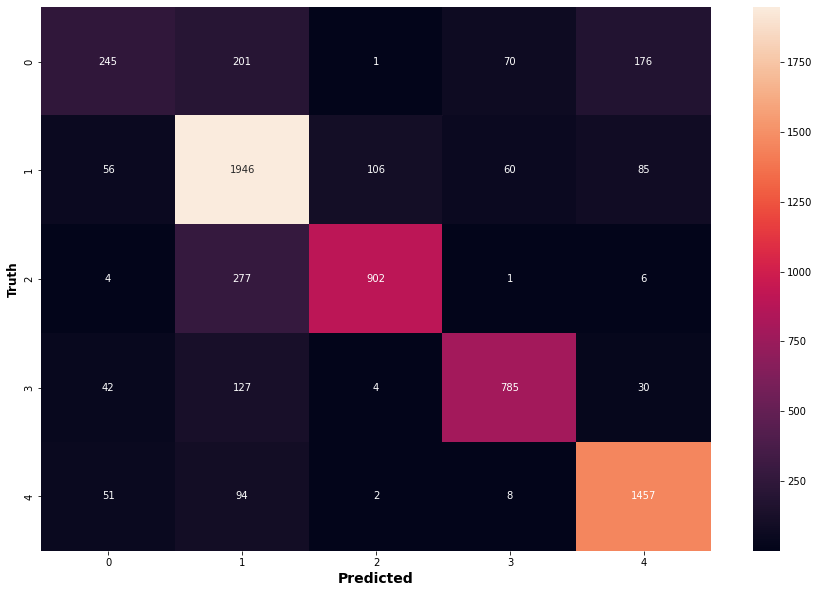

In [9]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sn.heatmap(cm, annot=True, fmt='d') # here, cm is called to be visualized
plt.xlabel('Predicted',fontsize=14.0, fontweight='bold')
plt.ylabel('Truth',fontsize=12.0, fontweight='bold')

#All Details

In [10]:
def confusion_details(y_test,y_pred):
    labels = list(set(y_test))
    labels.sort()

    print("Total labels: %s -> %s" % (len(labels), labels))

    df = pd.DataFrame(
        data=confusion_matrix(y_test, y_pred, labels=labels),
        columns=labels,
        index=labels
    )

    print(df)

    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Local (metrics per class)
    #
    tps = {}
    fps = {}
    fns = {}
    tns = {}

    precision_local = {}
    recall_local = {}
    f1_local = {}
    accuracy_local = {}
    specificity_local={}

    for label in labels:
        tps[label] = df.loc[label, label]
        fps[label] = df[label].sum() - tps[label]
        fns[label] = df.loc[label].sum() - tps[label]
        tns[label]=len(y_test) - (tps[label] + fps[label] + fns[label])
        
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        
        precision_local[label] = tp / (tp + fp) if (tp + fp) > 0. else 0.
        specificity_local[label] = tn / (tn + fp) if (tn + fp) > 0. else 0.
        recall_local[label] = tp / (tp + fn) if (tp + fp) > 0. else 0.
        p, r = precision_local[label], recall_local[label]
        
        f1_local[label] = 2. * p * r / (p + r) if (p + r) > 0. else 0.
        accuracy_local[label] = tp / (tp + fp + fn) if (tp + fp + fn) > 0. else 0.



    print("#-- Local measures --#")
    print("True Positives(TP):", tps)
    print("False Positives(FP):", fps)
    print("True Negatives(TN):", tns)
    print("False Negatives(FN):", fns)
    print("----------------------------")

    print("Precision:", precision_local)
    print("Recall/Sensitivity:", recall_local)
    print("Specificity:",specificity_local)
    print("F1-Score:", f1_local)
    print("Accuracy:", accuracy_local)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Global
    #
    micro_averages = {}
    macro_averages = {}

    correct_predictions = sum(tps.values())
    true_negative=sum(tns.values())

    den = sum(list(tps.values()) + list(fps.values()))
    micro_averages["Precision"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tps.values()) + list(fns.values()))
    micro_averages["Recall"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tns.values()) + list(fps.values()))
    micro_averages["Specificity"] = 1. * true_negative / den if den > 0. else 0.


    micro_avg_p, micro_avg_r = micro_averages["Precision"], micro_averages["Recall"]
    micro_averages["F1-score"] = 2. * micro_avg_p * micro_avg_r / (micro_avg_p + micro_avg_r) if (micro_avg_p + micro_avg_r) > 0. else 0.

    macro_averages["Precision"] = np.mean(list(precision_local.values()))
    macro_averages["Recall"] = np.mean(list(recall_local.values()))
    macro_averages["Specificity"]=np.mean(list(specificity_local.values()))


    macro_avg_p, macro_avg_r = macro_averages["Precision"], macro_averages["Recall"]
    macro_averages["F1-Score"] = 2. * macro_avg_p * macro_avg_r / (macro_avg_p + macro_avg_r) if (macro_avg_p + macro_avg_r) > 0. else 0.

    total_predictions = df.values.sum()
    accuracy_global = correct_predictions / total_predictions if total_predictions > 0. else 0.

    print("#-- Global measures --#")
    print("Micro-Averages:", micro_averages)
    print("Macro-Averages:", macro_averages)
    print("Correct predictions:", correct_predictions)
    print("Total predictions:", total_predictions)
    print("Accuracy:", accuracy_global)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()



    accuracy_local_new = {}
    for label in labels:
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        accuracy_local_new[label] = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0. else 0.

    total_true = sum(list(tps.values()) + list(tns.values()))
    total_predictions = sum(list(tps.values()) + list(tns.values()) + list(fps.values()) + list(fns.values()))
    accuracy_global_new = 1. * total_true / total_predictions if total_predictions > 0. else 0.

    print("Accuracy (per class), with TNs:", accuracy_local_new)
    print("Accuracy (per class), without TNs:", accuracy_local)
    print("Accuracy (global), with TNs:", accuracy_global_new)
    print("Accuracy (global), without TNs:", accuracy_global)

confusion_details(y_test,y_pred)

Total labels: 5 -> ['N1', 'N2', 'N3', 'R', 'W']
     N1    N2   N3    R     W
N1  245   201    1   70   176
N2   56  1946  106   60    85
N3    4   277  902    1     6
R    42   127    4  785    30
W    51    94    2    8  1457

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

#-- Local measures --#
True Positives(TP): {'N1': 245, 'N2': 1946, 'N3': 902, 'R': 785, 'W': 1457}
False Positives(FP): {'N1': 153, 'N2': 699, 'N3': 113, 'R': 139, 'W': 297}
True Negatives(TN): {'N1': 5890, 'N2': 3784, 'N3': 5433, 'R': 5609, 'W': 4827}
False Negatives(FN): {'N1': 448, 'N2': 307, 'N3': 288, 'R': 203, 'W': 155}
----------------------------
Precision: {'N1': 0.6155778894472361, 'N2': 0.7357277882797731, 'N3': 0.8886699507389163, 'R': 0.8495670995670995, 'W': 0.830672748004561}
Recall/Sensitivity: {'N1': 0.35353535353535354, 'N2': 0.8637372392365734, 'N3': 0.75798319327731